In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

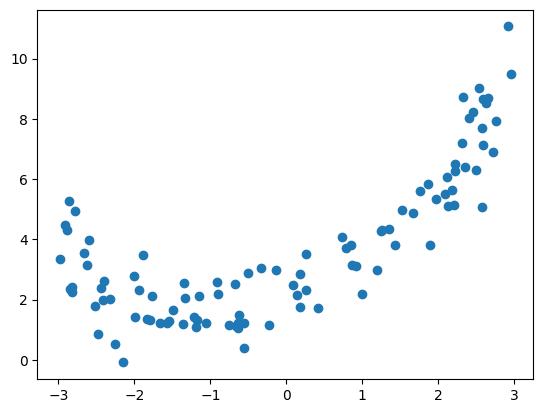

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.5510481773051605

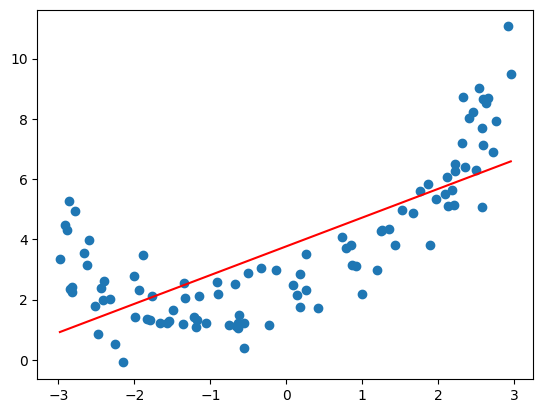

In [6]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

# 这种就是，没有很好的反应数据的特征，也就是太过简单了
# 这叫欠拟合 Underfitting
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

# 通过线性拟合得到的均方误差为3.x
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

2.6933444369517936

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# 这样传入进去的数据，就会依次调用函数，并传递下去
lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [9]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [10]:
# 可以看到非线性回归的均值方差会小很多（方差越小越好）
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

0.8366506779554661

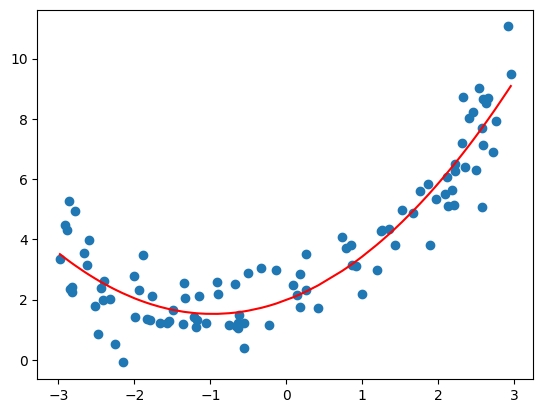

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

0.7444902358050131


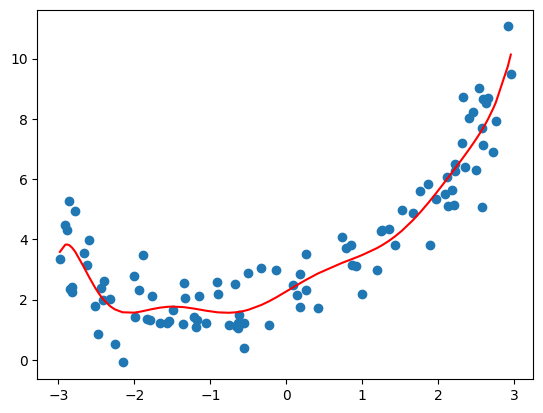

In [12]:
# 接下来我们试试更高的 degree
poly3_reg = PolynomialRegression(degree=10)
poly3_reg.fit(X, y)

y3_predict = poly3_reg.predict(X)
print(mean_squared_error(y, y3_predict))

plt.scatter(x, y)
plt.plot(np.sort(x), y3_predict[np.argsort(x)], color='r')
plt.show()

0.33522737656668933


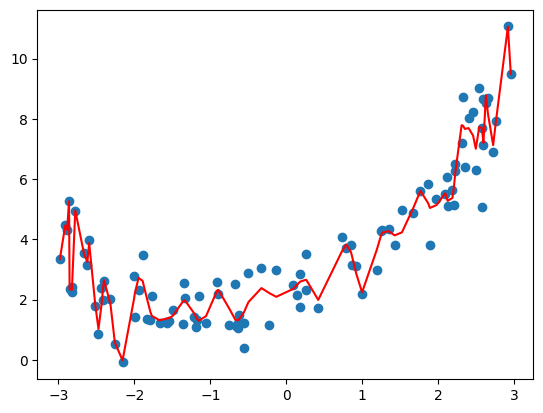

In [13]:
# 接下来我们试试更高的 degree
poly4_reg = PolynomialRegression(degree=100)
poly4_reg.fit(X, y)

y4_predict = poly4_reg.predict(X)
print(mean_squared_error(y, y4_predict))

plt.scatter(x, y)
plt.plot(np.sort(x), y4_predict[np.argsort(x)], color='r')
plt.show()

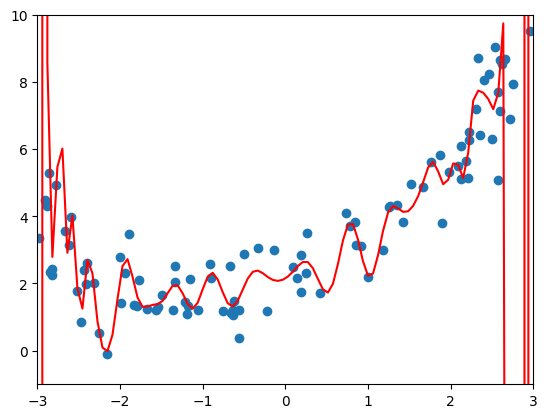

In [14]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly4_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])

# 可以看到，虽然连接了更多的点，但有些区域（如2.5, y)则会落得很上/下，过拟合了
# 这样新数据出现时，往往会预测不正确
# 这就是过拟合 Overfitting
plt.show()

In [20]:
lin_reg.coef_

array([ 2.14516494e+12, -1.29843181e+01, -1.16636858e+02,  3.75492818e+03,
        1.36404975e+04, -2.98667250e+05, -8.43914096e+05,  1.12006258e+07,
        2.84291595e+07, -2.42248242e+08, -5.69989237e+08,  3.36331640e+09,
        7.36810419e+09, -3.19144177e+10, -6.48761440e+10,  2.14710051e+11,
        4.02318296e+11, -1.04319708e+12, -1.78438148e+12,  3.66838856e+12,
        5.64280416e+12, -9.17171082e+12, -1.23527024e+13,  1.54453105e+13,
        1.71446288e+13, -1.49061971e+13, -1.07823388e+13,  2.40587368e+12,
       -5.94029029e+12,  1.04716203e+13,  1.22570821e+13, -5.39619156e+12,
        2.94425151e+12, -8.08295843e+12, -1.11987876e+13,  3.32645051e+12,
       -4.91841752e+12,  7.98918217e+12,  8.26243192e+12,  4.38308990e+11,
        8.83961710e+12, -6.32038673e+12, -1.76641321e+12, -4.65058614e+12,
       -9.81333148e+12,  1.83284596e+12, -6.47500228e+12,  5.30191354e+12,
        3.18947509e+12,  3.58766303e+12,  9.15030998e+12, -1.25914346e+12,
        7.13095180e+12, -

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 此时预测的数据是新的且是我们已知的
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.725542026665694

In [17]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)

# 可以看到我们使用二阶模型是比线性模型的泛化能力强的
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.7384627924689029

In [18]:
# 试试 10阶
poly3_reg = PolynomialRegression(degree=10)
poly3_reg.fit(X_train, y_train)

# 但过大的话，还没二阶好
y3_predict = poly3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

0.8229867458970991

In [19]:
# 100阶
poly4_reg = PolynomialRegression(degree=100)
poly4_reg.fit(X_train, y_train)

# 但过大的话，还没二阶好
y4_predict = poly4_reg.predict(X_test)
# 可以看到误差都上亿了
# 也就是预测新数据是很差的
mean_squared_error(y_test, y4_predict)

2877140355225593.0